In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from scipy.stats import probplot

## Skewness

## Kurtosis

## Sensitivity to outliers

## Over-reliance on Gaussian Distribution

In [ ]:
# Function to generate synthetic data
def generate_data(size, distribution='normal'):
    np.random.seed(42)
    x = np.random.uniform(0, 10, size)
    if distribution == 'normal':
        # Normally distributed residuals
        e = np.random.normal(0, 2, size)
    else:
        # Non-normally distributed residuals (exponential)
        e = np.random.exponential(2, size)
    y = 3*x + e
    return x, y, e

In [ ]:
# Fit regression model
def fit_regression(x, y):
    model = LinearRegression()
    model.fit(x[:, np.newaxis], y)
    y_pred = model.predict(x[:, np.newaxis])
    residuals = y - y_pred
    return residuals, model.score(x[:, np.newaxis], y)

In [ ]:
# Generate synthetic data
size = 100
x_normal, y_normal, e_normal = generate_data(size, 'normal')
x_non_normal, y_non_normal, e_non_normal = generate_data(size, 'non_normal')

In [ ]:
# Fit linear regression models
residuals_normal, score_normal = fit_regression(x_normal, y_normal)
residuals_non_normal, score_non_normal = fit_regression(x_non_normal, y_non_normal)

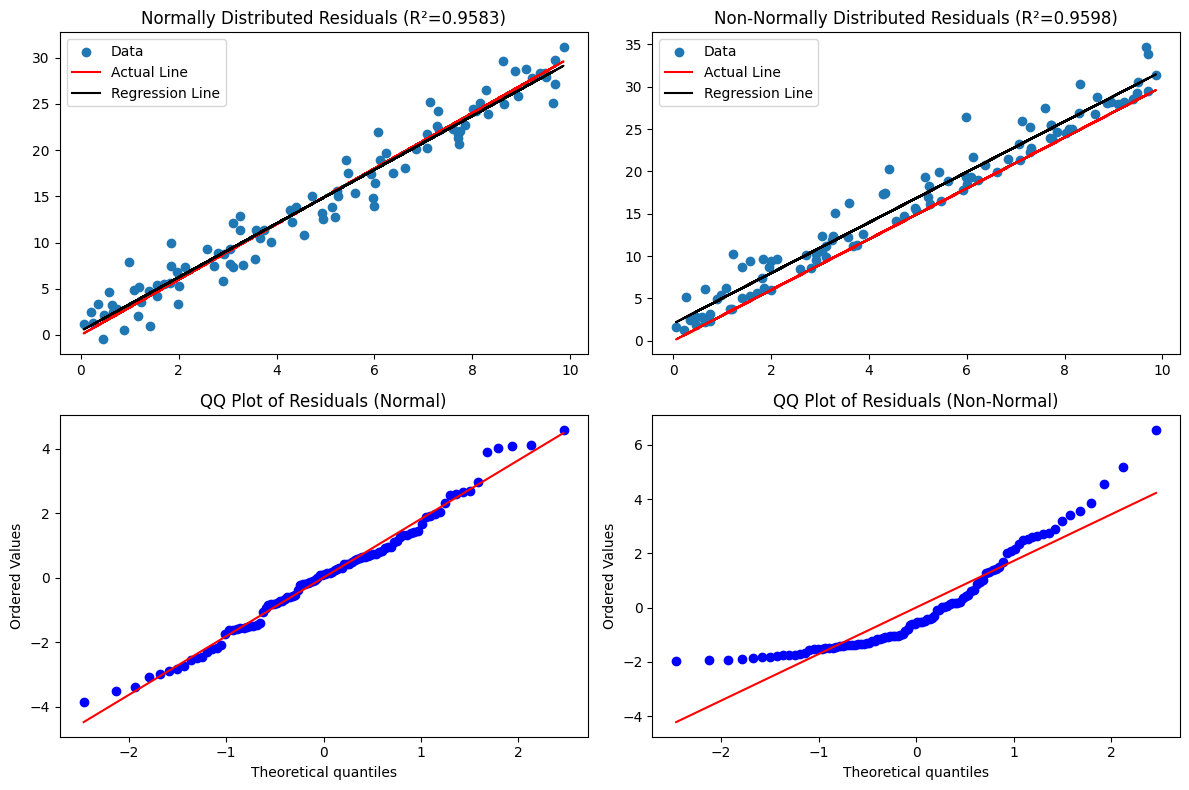

In [ ]:
# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Scatter plot and regression line for normally distributed residuals
axs[0, 0].scatter(x_normal, y_normal, label='Data')
axs[0, 0].plot(x_normal, x_normal*3, color='red', label='Actual Line')
m_normal, c_normal = np.polyfit(x_normal, y_normal, 1)
axs[0, 0].plot(x_normal, m_normal * x_normal + c_normal, color='black', label='Regression Line')
axs[0, 0].set_title(f'Normally Distributed Residuals (R²={score_normal:.4f})')
axs[0, 0].legend()

# Scatter plot and regression line for non-normally distributed residuals
axs[0, 1].scatter(x_non_normal, y_non_normal, label='Data')
axs[0, 1].plot(x_non_normal, x_non_normal*3, color='red', label='Actual Line')
m_non_normal, c_non_normal = np.polyfit(x_non_normal, y_non_normal, 1)
axs[0, 1].plot(x_normal, m_non_normal * x_normal + c_non_normal, color='black', label='Regression Line')
axs[0, 1].set_title(f'Non-Normally Distributed Residuals (R²={score_non_normal:.4f})')
axs[0, 1].legend()

# QQ plot for normally distributed residuals
probplot(residuals_normal, dist="norm", plot=axs[1, 0])
axs[1, 0].set_title('QQ Plot of Residuals (Normal)')

# QQ plot for non-normally distributed residuals
probplot(residuals_non_normal, dist="norm", plot=axs[1, 1])
axs[1, 1].set_title('QQ Plot of Residuals (Non-Normal)')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# perform Shapiro Test
def shapiro_test(data, name):
  shapiro_test = stats.shapiro(data)
  print(f"{name}: \n Shapiro W: {shapiro_test.statistic} \n Shapiro p-value: {shapiro_test.pvalue}")

In [ ]:
for name, data in zip(["Normal", "Non-Normal"], [residuals_normal, residuals_non_normal]):
  shapiro_test(data, name)

Normal: 
 Shapiro W: 0.9846272468566895 
 Shapiro p-value: 0.2984403073787689
Non-Normal: 
 Shapiro W: 0.8658567070960999 
 Shapiro p-value: 4.788261875887656e-08
